# 천안 공모전 제출용 

## 천안의 관광지 수는 적은 편이 아닌데 왜 관광률이 낮을까? 라는 질문으로 시작되어 관광지를 홍보하는 방향으로 아이디어를 내보려고 합니다. 

# [지역별 관광지 개수 비교]

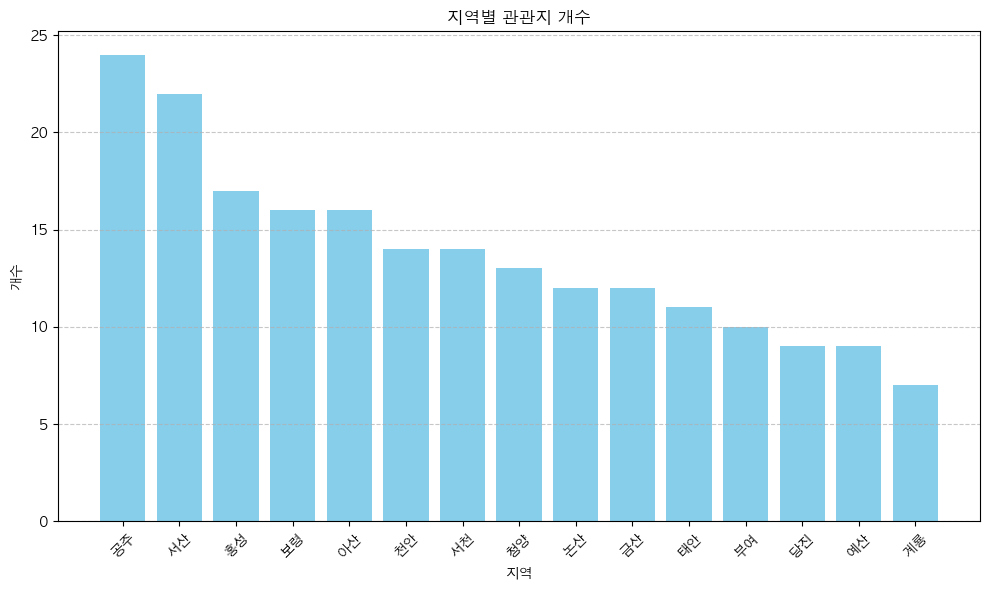

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

df = pd.read_csv('관광명소.csv', encoding='cp949')  

value_counts = df['지역'].value_counts()
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['지역', '개수']


plt.figure(figsize=(10, 6))  
plt.bar(value_counts_df['지역'], value_counts_df['개수'], color='skyblue')  
plt.xlabel('지역')  
plt.ylabel('개수')  
plt.title('지역별 관관지 개수') 
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  


plt.show()

# [네비게이션 데이터 기반 목적지 유형을 확인해 역사관광의 검색량이 낮다는 것을 확인]

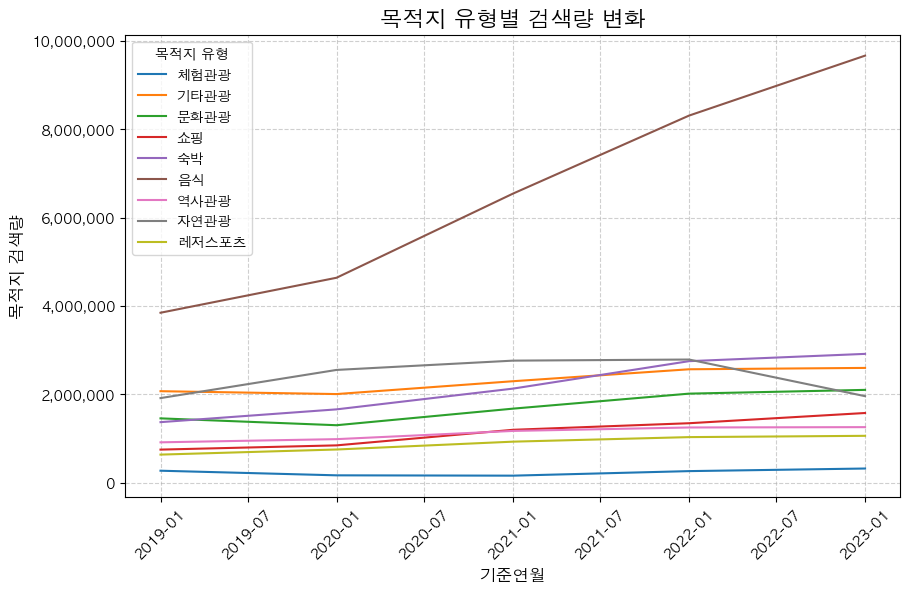

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

# 데이터 로드
df = pd.read_csv('20240822000558_목적지 유형별 검색량.csv', encoding='cp949')
df.drop(index=df.index[0:5], inplace=True)  # 첫 5개의 행 제거

# '기준연월'을 datetime 형식으로 변환
df['기준연월'] = pd.to_datetime(df['기준연월'], format='%Y', errors='coerce')

# '기준연월' 오름차순 정렬
df = df.sort_values(by='기준연월')

# 각 '목적지 유형'에 대해 선그래프 생성
plt.figure(figsize=(10, 6))
for 유형 in df['목적지 유형'].unique():
    subset = df[df['목적지 유형'] == 유형]
    plt.plot(subset['기준연월'], subset['목적지 검색량'], label=유형)

# y축 숫자를 일반적인 형식으로 표시
plt.gca().get_yaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=False))
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
# 그래프 꾸미기
plt.title('목적지 유형별 검색량 변화', fontsize=16)
plt.xlabel('기준연월', fontsize=12)
plt.ylabel('목적지 검색량', fontsize=12)
plt.legend(title='목적지 유형', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# x축 날짜 포맷 조정 (optional)
plt.xticks(rotation=45)

# 그래프 출력
plt.show()


## 관광 인프라 부족: 천안은 교통이 편리한 도시임에도 불구하고, 
## 관광객들이 머무를 수 있는 숙박 시설이나 관광 관련 편의시설이 상대적으로 부족한 것을 확인했습니다. 
    

# [충청남도와 천안시의 관광 사업체 영업 현황을 비교. ]

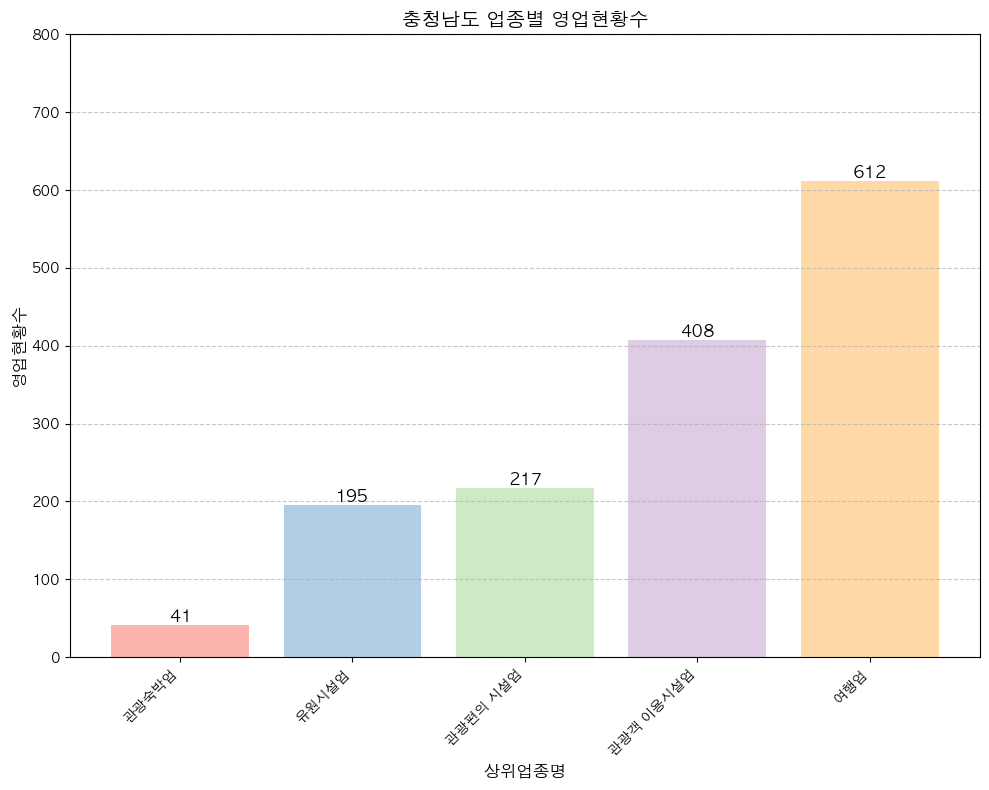

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

df = pd.read_csv('20240821165102_업종별 관광사업체 수.csv',encoding='cp949')

filtered_df = df[(df['업종명'] == '전체') & (df['상위업종명'] != '전체')]
data = filtered_df.groupby('상위업종명')['영업현황수'].sum().sort_values()

# 세로 막대 차트 그리기
plt.figure(figsize=(10, 8))
bars = plt.bar(data.index, data.values, color=plt.get_cmap('Pastel1').colors[:len(data)])

# 각 막대에 값 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{height}', 
             ha='center', 
             va='bottom', 
             fontsize=12, 
             color='black', 
             fontweight='bold')

# 제목과 레이블 추가
plt.title('충청남도 업종별 영업현황수', fontsize=14)
plt.xlabel('상위업종명', fontsize=12)
plt.ylabel('영업현황수', fontsize=12)
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축에만 격자선 추가
# Y축 최대 값 설정
plt.ylim(0, 800)


# 레이아웃 조정
plt.tight_layout()
plt.show()



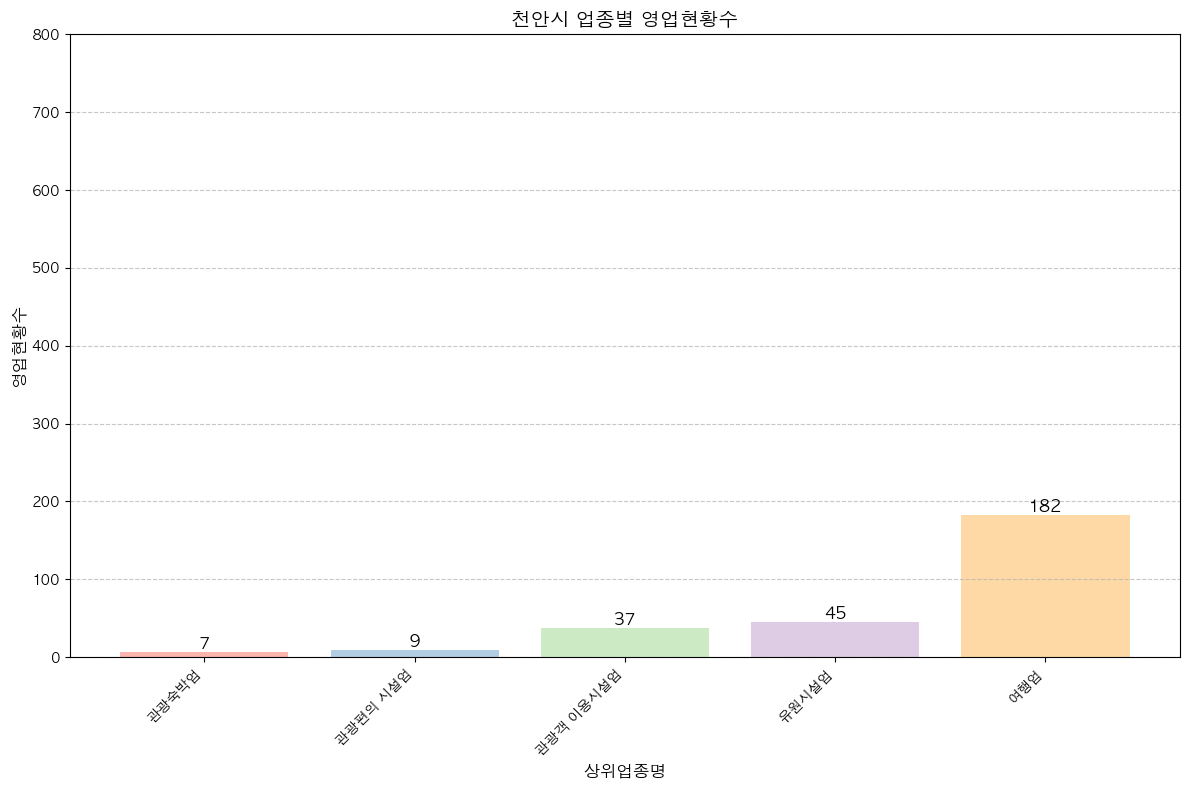

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc


file1 = '20240821182249천안시_동남구_업종별 관광사업체 수.csv'
file2 = '20240821182258_천안시_서북구_업종별 관광사업체 수.csv'

# 데이터 읽어오기
df1 = pd.read_csv(file1, encoding='cp949')
df2 = pd.read_csv(file2, encoding='cp949')

# 데이터 합치기
combined_df = pd.concat([df1, df2], ignore_index=True)


combined_df.to_csv('combined_data.csv', index=False, encoding='cp949')



# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

# 합쳐진 데이터 읽어오기
combined_df = pd.read_csv('combined_data.csv', encoding='cp949')

# 예시 데이터 필터링 (업종명 '전체'와 상위업종명 '전체'가 아닌 데이터)
filtered_df = combined_df[(combined_df['업종명'] == '전체') & (combined_df['상위업종명'] != '전체')]

# '상위업종명'별로 '영업현황수' 집계
data = filtered_df.groupby('상위업종명')['영업현황수'].sum().sort_values()

# 파스텔 톤 색상 맵 생성 (matplotlib의 'Pastel1' 색상 맵 사용)
pastel_colors = plt.get_cmap('Pastel1').colors

# 세로 막대 차트 그리기
plt.figure(figsize=(12, 8))
bars = plt.bar(data.index, data.values, color=pastel_colors[:len(data)])

# 각 막대에 값 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{height}', 
             ha='center', 
             va='bottom', 
             fontsize=12, 
             color='black', 
             fontweight='bold')

# 제목과 레이블 추가
plt.title('천안시 업종별 영업현황수', fontsize=14)
plt.xlabel('상위업종명', fontsize=12)
plt.ylabel('영업현황수', fontsize=12)
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축에만 격자선 추가

# Y축 최대 값 설정
plt.ylim(0, 800)
#충남이랑 비교를 위해 최댓갑 800으로.

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 외국인들이 가장 많이 가는 관광지는 어떤 것이 있으며, 가장 많이 가는 3곳이 어디일까?

# [외국인 관광객 선호 관관지 상위 3개 찾기]

In [28]:
import pandas as pd
import re

# 문제의 CSV 파일 이름
file = '20240821002733_외국인 관심 관광지_일본어.csv'

# CSV 파일 읽기
df = pd.read_csv(file, encoding='cp949')

# 필요한 칼럼만 선택 ('언어명'과 '관광지명')
df_selected = df[['언어명', '관광지명','사용자방문건수']].copy()

# 관광지명에서 괄호 안의 내용만 추출하는 함수
def extract_in_parentheses(text):
    match = re.search(r'\((.*?)\)', text)
    if match:
        return match.group(1).strip()
    return None

# 관광지명 칼럼에서 괄호 안의 내용만 추출
df_selected['관광지명'] = df_selected['관광지명'].apply(lambda x: extract_in_parentheses(str(x)))

# 대체할 값 리스트
replacement_list = ['(독립기념관)', '(각원사)', '(天安)', '(한민족역사문화공원)', '(소노벨천안오션어드벤처)', '(들꽃)','(상록아쿠아피아)']

# None 값을 순서대로 대체할 함수
def replace_none_with_list(series, replacement_list):
    # None 값의 인덱스를 찾기
    nan_indices = series.index[series.isna()]
    # 대체값 순서대로 할당
    for i, idx in enumerate(nan_indices):
        series.loc[idx] = replacement_list[i % len(replacement_list)]
    return series

# None 값을 리스트의 값으로 대체
df_selected['관광지명'] = replace_none_with_list(df_selected['관광지명'], replacement_list)

# 결과 출력
df_selected


# df_selected 데이터프레임을 CSV 파일로 저장
file_name = '20240821002733_외국인 관심 관광지_일본어_수정.csv'
df_selected.to_csv(file_name, index=False, encoding='cp949')


/var/folders/6y/9r5t2yv91tv_xlty4q28bqn40000gn/T/ipykernel_58531/2380260518.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[idx] = replacement_list[i % len(replacement_list)]


In [33]:
import pandas as pd
import re

# 4개의 CSV 파일 목록
file_list = [
    '20240821002733_외국인 관심 관광지_영어권.csv',
    '20240821002733_외국인 관심 관광지_일본어_수정.csv', 
    '20240821002733_외국인 관심 관광지_중번체.csv', 
    '20240821002733_외국인 관심 관광지_중간체.csv'
]

# 빈 데이터프레임 생성
combined_df = pd.DataFrame()

# 각 파일에 대해 반복 작업 수행
for file in file_list:
    # CSV 파일 읽기
    df = pd.read_csv(file, encoding='cp949')
    
    # 필요한 칼럼만 선택
    df_selected = df[['관광지명', '사용자방문건수']].copy()
    
    # 관광지명에서 공백 제거
    df_selected['관광지명'] = df_selected['관광지명'].str.replace(' ', '')
    
    # 관광지명에서 괄호 안의 내용만 추출하는 함수
    def extract_in_parentheses(text):
        match = re.search(r'\((.*?)\)', text)
        if match:
            return match.group(1)
        return text  # 괄호가 없을 경우 원래 텍스트 반환
    
    # 관광지명 칼럼에서 괄호 안의 내용만 추출
    df_selected['관광지명'] = df_selected['관광지명'].apply(extract_in_parentheses)
    
    # 같은 관광지명의 사용자방문건수를 더하기 위해 groupby 사용
    df_selected = df_selected.groupby('관광지명', as_index=False)['사용자방문건수'].sum()
    
    # 선택된 데이터를 합치기 위해 combined_df에 추가
    if combined_df.empty:
        combined_df = df_selected
    else:
        # 이미 합쳐진 combined_df와 새로운 df_selected를 병합하여 사용자방문건수를 더해줌
        combined_df = pd.concat([combined_df, df_selected], ignore_index=True)
        combined_df = combined_df.groupby('관광지명', as_index=False)['사용자방문건수'].sum()

# 특정 키워드에 대한 사용자방문건수 합산
keywords = ['각원사', '독립기념관', '소노벨', '삼거리공원', '상록아쿠아피아']

for keyword in keywords:
    combined_df.loc[combined_df['관광지명'].str.contains(keyword), '관광지명'] = keyword

# 합산 작업 후 중복된 관광지명 합치기
combined_df = combined_df.groupby('관광지명', as_index=False)['사용자방문건수'].sum()

# 광덕사와 天安 합산
if '광덕사' in combined_df['관광지명'].values and '天安' in combined_df['관광지명'].values:
    combined_df.loc[combined_df['관광지명'] == '광덕사', '사용자방문건수'] += combined_df.loc[combined_df['관광지명'] == '天安', '사용자방문건수']
    combined_df = combined_df[combined_df['관광지명'] != '天安']

# 사용자방문건수 기준으로 내림차순 정렬
combined_df = combined_df.sort_values(by='사용자방문건수', ascending=False)
top_4_df = combined_df.head(4)

# 결과 출력
print(top_4_df)


    관광지명  사용자방문건수
5  독립기념관     2971
1    각원사     1416
9    소노벨      577
7  삼거리공원      320


In [34]:

# 관광명소.csv 파일 불러오기
location_df = pd.read_csv('관광명소.csv', encoding='cp949')

top_4_df['관광지명'] = top_4_df['관광지명'].apply(standardize_name)
location_df['이름'] = location_df['이름'].apply(standardize_name)

# top_4_df의 관광지명과 location_df의 이름을 비교하여 좌표 찾기
def get_coordinates(name):
    row = location_df[location_df['이름'] == name]
    if not row.empty:
        return row.iloc[0]['좌표(x)'], row.iloc[0]['좌표(y)']
    return None, None

# 필터링된 관광지명을 좌표로 변환
top_4_df['좌표(x)'], top_4_df['좌표(y)'] = zip(*top_4_df['관광지명'].apply(get_coordinates))

# 유효한 좌표가 있는 경우에만 지도를 생성
valid_locations = top_4_df.dropna(subset=['좌표(x)', '좌표(y)'])
if not valid_locations.empty:
    # 초기 지도 생성 (위도, 경도를 사용하여 중앙 위치 설정)
    initial_lat = valid_locations['좌표(x)'].mean()
    initial_lon = valid_locations['좌표(y)'].mean()
    top_map = folium.Map(location=[initial_lat, initial_lon], zoom_start=12)

    # 각 관광지에 마커 추가
    for _, row in valid_locations.iterrows():
        folium.Marker(
            location=[row['좌표(x)'], row['좌표(y)']],
            icon=folium.Icon(color='red', icon='flag', prefix='fa'),
            popup=row['관광지명']
        ).add_to(top_map)

    # top_4_df를 CSV 파일로 저장
    output_csv_path = 'top_4_with_coordinates.csv'
    top_4_df.to_csv(output_csv_path, index=False, encoding='cp949')
    print(f"변경된 데이터가 성공적으로 저장되었습니다. 파일 경로: {output_csv_path}")

top_map


변경된 데이터가 성공적으로 저장되었습니다. 파일 경로: top_4_with_coordinates.csv


/var/folders/6y/9r5t2yv91tv_xlty4q28bqn40000gn/T/ipykernel_58531/3282503351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_4_df['관광지명'] = top_4_df['관광지명'].apply(standardize_name)
/var/folders/6y/9r5t2yv91tv_xlty4q28bqn40000gn/T/ipykernel_58531/3282503351.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_4_df['좌표(x)'], top_4_df['좌표(y)'] = zip(*top_4_df['관광지명'].apply(get_coordinates))
/var/folders/6y/9r5t2yv91tv_xlty4q28bqn40000gn/T/ipykernel_58531/3282503351.py:15: SettingWithCopyWarning: 
A 

## 인기 3곳의 관광지 근처의 숙박업소와, 카페의 위치를 확인해 관광 인프라가 형성되어있는지 확실하게 알아보기.

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# CSV 파일 읽기
hotel = pd.read_csv('20240821000744_지역별 관광지 검색순위 2.csv', encoding='cp949')

# '천안시 동남구'와 '천안시 서북구' 데이터프레임 생성
a = hotel[hotel['시/군/구'] == '천안시 동남구']
b = hotel[hotel['시/군/구'] == '천안시 서북구']

# 소분류카테고리가 '모텔'인 데이터 제외
a = a[a['소분류 카테고리'] != '모텔']
b = b[b['소분류 카테고리'] != '모텔']

# 두 데이터프레임을 합침
combined_df = pd.concat([a, b], ignore_index=True)

# 도로명주소를 위도와 경도로 변환하는 함수
def geocode_address(address):
    try:
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude
        return None, None
    except GeocoderTimedOut:
        return geocode_address(address)  # 타임아웃 시 재시도

# Geocoder 초기화
geolocator = Nominatim(user_agent="geoapiExercises")

# 도로명주소 칼럼과 새로 생성할 위도, 경도 칼럼
combined_df[['위도', '경도']] = combined_df['도로명주소'].apply(lambda x: pd.Series(geocode_address(x)))

# 결과를 새로운 CSV 파일로 저장
output_file_path = 'combined_with_coordinates.csv'  # 수정: 결과를 저장할 파일 경로
combined_df.to_csv(output_file_path, index=False, encoding='cp949')



In [36]:
ss = pd.read_csv('combined_with_coordinates.csv', encoding='cp949')
ss

,순위,광역시/도,시/군/구,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,위도,경도
0,2,충청남도,천안시 동남구,소노벨천안,충남 천안시 동남구 종합휴양지로 200-0,숙박,콘도미니엄,93215,36.752415,127.219617
1,30,충청남도,천안시 동남구,더메인즈호텔,충남 천안시 동남구 청수11로 34-0,숙박,호텔,6972,36.782801,127.154735
2,50,충청남도,천안시 동남구,독립기념관야영장,충남 천안시 동남구 독립기념관로 1-0,숙박,캠핑,4995,36.777978,127.231585
3,70,충청남도,천안시 동남구,상록호텔,충남 천안시 동남구 수신로 576-0,숙박,호텔,4250,NaN,NaN
4,96,충청남도,천안시 동남구,브라운도트호텔천안터미널점,충남 천안시 동남구 신부3길 25-0,숙박,호텔,3655,36.816237,127.159853
5,138,충청남도,천안시 동남구,웨스턴호텔,충남 천안시 동남구 신부2길 25-0,숙박,호텔,3035,36.819569,127.161182
6,183,충청남도,천안시 동남구,아우내관광농원 캠핑장,충남 천안시 동남구 관성3길 267-39,숙박,캠핑,2643,36.820240,127.341691
7,185,충청남도,천안시 동남구,천안국민여가캠핑장,충남 천안시 동남구 교촌7길 46-13,숙박,캠핑,2591,36.802083,127.229825
8,278,충청남도,천안시 동남구,호두나무캠핑장,충남 천안시 동남구 해사동길 15-0,숙박,캠핑,2016,NaN,NaN
9,285,충청남도,천안시 동남구,호텔캄캄,충남 천안시 동남구 신부2길 31-0,숙박,호텔,1985,36.819569,127.161182


In [39]:
import pandas as pd
import folium

# CSV 파일 읽기
combined_df = pd.read_csv('combined_with_coordinates.csv', encoding='cp949')
location_df = pd.read_csv('top_4_with_coordinates.csv', encoding='cp949')

# '삼거리공원'과 '천안삼거리'를 같은 장소로 처리하기 위한 함수
def standardize_name(name):
    if '삼거리공원' in name:
        return '천안삼거리'
    return name

# NaN 값을 가진 행 제거
combined_df_cleaned = combined_df[['관광지명', '위도', '경도']].dropna()
location_df_cleaned = location_df[['관광지명', '좌표(x)', '좌표(y)']].dropna()

# 지도 생성 (초기 위치는 첫 번째 데이터의 위도와 경도로 설정)
initial_lat = combined_df_cleaned['위도'].iloc[0]
initial_lon = combined_df_cleaned['경도'].iloc[0]
combined_map = folium.Map(location=[initial_lat, initial_lon], zoom_start=12)

# location_df_cleaned에서 마커 추가
for index, row in location_df_cleaned.iterrows():
    folium.Circle(
        location=[row['좌표(x)'], row['좌표(y)']],
        popup=folium.Popup(f"관광지명: {row['관광지명']}", max_width=300),
        radius=2000,  # 원의 반경 (미터 단위)
        color='blue',  # 원의 테두리 색상
        fill=True,  # 원 내부를 채울지 여부
        fill_color='blue',  # 원 내부 색상
        fill_opacity=0.3  # 원 내부의 투명도 (0.0에서 1.0까지)
    ).add_to(combined_map)
    
    folium.Marker(
        location=[row['좌표(x)'], row['좌표(y)']],
        popup=folium.Popup(f"관광지명: {row['관광지명']}", max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(combined_map)

# combined_df_cleaned에서 마커 추가
for index, row in combined_df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        popup=folium.Popup(f"관광지명: {row['관광지명']}", max_width=300),
        radius=5,  # 원의 반경 (미터 단위)
        color='red',  # 원의 테두리 색상
        fill=True,  # 원 내부를 채울지 여부
        fill_color='red',  # 원 내부 색상
        fill_opacity=1  # 원 내부의 투명도 (0.0에서 1.0까지)
    ).add_to(combined_map)

# 추가할 새로운 마커: '유관순 열사 사적지'
folium.Marker(
    location=[36.759475, 127.308020],
    popup=folium.Popup("관광지명: 유관순 열사 사적지", max_width=300),
    icon=folium.Icon(color='black', icon='star')  # 초록색 별 아이콘 사용
).add_to(combined_map)

folium.Circle(
    location=[36.759475, 127.308020],
    popup=folium.Popup("관광지명: 유관순 열사 사적지", max_width=300),
    radius=2000,  # 원의 반경 (미터 단위)
    color='black',  # 원의 테두리 색상
    fill=True,  # 원 내부를 채울지 여부
    fill_color='black',  # 원 내부 색상
    fill_opacity=0.3  # 원 내부의 투명도 (0.0에서 1.0까지)
).add_to(combined_map)

combined_map


# 천안에 위치한 관광식당 유무 

In [40]:
import pandas as pd

food = pd.read_csv('천안시_관광식당.csv', encoding='cp949')

# '영업/정상' 상태인 행만 선택
filtered_food = food[food['영업상태명'] == '영업/정상']

# '도로명전체주소'에서 '충청남도 천안시'가 포함된 행만 선택
filtered_addresses = filtered_food[filtered_food['도로명전체주소'].str.contains('충청남도 천안시', na=False)]

# 특정 컬럼들만 선택
selected_columns = filtered_addresses[['사업장명', '도로명전체주소']]

# 결과 확인
if selected_columns.empty:
    print("천안시에는 관광식당이 없습니다.")
else:
    print(selected_columns)


천안시에는 관광식당이 없습니다.


# 관광지와 카페의 위치 비교

In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import re


file_path = 'fulldata_07_24_05_P_휴게음식점.csv'
df = pd.read_csv(file_path, encoding='cp949')  # 인코딩을 'cp949'로 설정 (한글 처리)

# 1. '영업/정상' 상태인 행만 선택
filtered_food = df[df['영업상태명'] == '영업/정상']

# 2. '위생업태명'이 '일반조리판매' 또는 '커피숍'인 행만 선택
filtered_food = filtered_food[filtered_food['위생업태명'].isin(['일반조리판매', '커피숍'])]

# 3. '도로명전체주소'에서 '충청남도 천안시'가 포함된 행만 선택
filtered_addresses = filtered_food[filtered_food['도로명전체주소'].str.contains('충청남도 천안시', na=False)]

# 4. 괄호 안의 내용과 쉼표 이후의 내용을 제거하는 함수 정의
def clean_address(address):
    if pd.isna(address):
        return address
    # 괄호 안의 내용 제거
    address = re.sub(r'\(.*?\)', '', address)
    # 쉼표 이후의 내용 제거
    address = re.sub(r',.*', '', address)
    return address.strip()

# '도로명전체주소' 컬럼에 함수 적용
filtered_addresses['도로명전체주소'] = filtered_addresses['도로명전체주소'].apply(clean_address)

# 5. 필요한 컬럼들만 선택
final_result = filtered_addresses[['도로명전체주소', '영업상태명', '사업장명', '위생업태명']]

# 결과를 CSV 파일로 저장
final_result.to_csv('filtered_food.csv', index=False, encoding='cp949')

# 지오코딩 API 설정
geolocator = Nominatim(user_agent="geoapiExercises")

def geocode_address(address):
    try:
        location = geolocator.geocode(address, timeout=10)
        if location:
            return (location.latitude, location.longitude)
        else:
            return (None, None)
    except GeocoderTimedOut:
        return geocode_address(address)  # 재시도

# 주소를 위도와 경도로 변환
df[['위도', '경도']] = df['도로명전체주소'].apply(lambda x: pd.Series(geocode_address(x)))

# 위도와 경도 정보를 추가한 CSV 파일로 저장
df.to_csv('filtered_cafe_수정.csv', encoding='cp949', index=False)


# 지도 생성 (중앙 좌표는 임의로 설정)
map_center = [df['위도'].mean(), df['경도'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# 지도에 마커 추가
for idx, row in df.iterrows():
    if pd.notna(row['위도']) and pd.notna(row['경도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['사업장명'],
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(m)
# 추가할 새로운 마커: '유관순 열사 사적지'
folium.Marker(
    location=[36.759475, 127.308020],
    popup=folium.Popup("관광지명: 유관순 열사 사적지", max_width=300),
    icon=folium.Icon(color='black', icon='star')  # 초록색 별 아이콘 사용
).add_to(combined_map)

folium.Circle(
    location=[36.759475, 127.308020],
    popup=folium.Popup("관광지명: 유관순 열사 사적지", max_width=300),
    radius=2000,  # 원의 반경 (미터 단위)
    color='black',  # 원의 테두리 색상
    fill=True,  # 원 내부를 채울지 여부
    fill_color='black',  # 원 내부 색상
    fill_opacity=0.3  # 원 내부의 투명도 (0.0에서 1.0까지)
).add_to(combined_map)

# 지도 저장
m


In [41]:
import pandas as pd
import folium

# CSV 파일 읽어오기
filtered_cafe = pd.read_csv('filtered_cafe_수정.csv', encoding='cp949')

# 지도 생성 (중앙 좌표는 대한민국 대략적인 중앙으로 설정)
map_center = [36.5, 127.5]
m = folium.Map(location=map_center, zoom_start=7)

# filtered_cafe_수정.csv의 데이터로 커피잔 아이콘 마커 추가
for _, row in filtered_cafe.iterrows():
    if pd.notna(row['위도']) and pd.notna(row['경도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=f"카페명: {row['사업장명']}",
            icon=folium.Icon(color='red', icon='fa-coffee', prefix='fa')  # FontAwesome 커피잔 아이콘
        ).add_to(m)

# 유관순 열사 사적지 마커 추가
folium.Marker(
    location=[36.759475, 127.308020],
    popup=folium.Popup("관광지명: 유관순 열사 사적지", max_width=300),
    icon=folium.Icon(color='black', icon='star')  # 검정색 별 아이콘
).add_to(m)

# 유관순 열사 사적지 주변 원 추가
folium.Circle(
    location=[36.759475, 127.308020],
    popup=folium.Popup("관광지명: 유관순 열사 사적지", max_width=300),
    radius=2000,  # 원의 반경 (미터 단위)
    color='black',  # 원의 테두리 색상
    fill=True,  # 원 내부를 채울지 여부
    fill_color='black',  # 원 내부 색상
    fill_opacity=0.3  # 원 내부의 투명도 (0.0에서 1.0까지)
).add_to(m)

# 지도 저장
m


# 관광지 근처 모텔을 제외한 숙박시설의 위치를 찾기. 유명한 관광지도 숙박 시설이 부족하고, 유관순 역사 유적지 근처엔 숙박시설이 없는 것을 알 수 있으며, 카페도 관광지 근처엔 부족한 것을 알 수 있다. 

# [템플스테이 방문자 수 ]

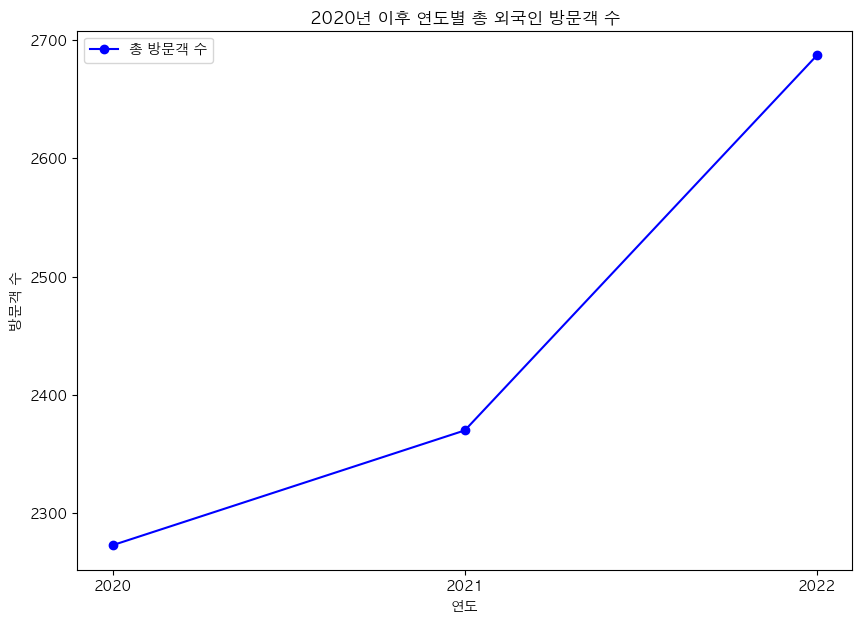

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FuncFormatter, MaxNLocator

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

# CSV 파일 읽기
df = pd.read_csv('제주특별자치도_템플스테이운영현황_20230310.csv', encoding='cp949')

# '데이터 기준일자' 칼럼 삭제
df = df.drop(columns=['데이터기준일자'])

# '연도' 기준으로 오름차순 정렬
df_sorted = df.sort_values(by='연도')

# 같은 '연도'별로 데이터 합산
df_grouped = df_sorted.groupby('연도').sum().reset_index()

# 각 절의 방문객 수를 합산하여 연도별 총 방문객 수를 계산
df_grouped['총방문객수'] = df_grouped[['약천사', '관음사', '백제사', '금룡사']].sum(axis=1)

# 2020년 이후의 데이터만 필터링
df_filtered = df_grouped.query('연도 >= 2020')

# 꺾은선 그래프 생성
plt.figure(figsize=(10, 7))
plt.plot(df_filtered['연도'], df_filtered['총방문객수'], marker='o', color='blue', label='총 방문객 수')

# 차트 제목과 레이블 설정
plt.title('2020년 이후 연도별 총 외국인 방문객 수')
plt.xlabel('연도')
plt.ylabel('방문객 수')

# 연도를 소수점 없이 정수로 표시하고, x축 눈금을 1년 단위로 설정
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# 범례 추가
plt.legend()

# 차트 보여주기
plt.show()


# 아이디어 
관광지 주변 인프라가 부족하고, 관광지 홍보가 부족하다는 결론을 내리게 되었습니다. 
그렇기에 한국의 역사가 생소한 외국인들을 타겟으로 역사 관광지를 홍보할 수 있는 아이디어를 내보았습니다. 
1. 유관순 열사 유적지 :
    티켓 디자인: 계절별 꽃을 활용한 디자인으로 관광객들이 찍고 싶어하는 예쁜 티켓 제작.
    소셜 미디어 캠페인: 인스타그램에 티켓 사진을 올리고 해시태그를 사용하도록 유도. 이를 통해 자연스러운 유관순 열사 유적지의 노출 증가.
    제휴업체 모집: 제휴식당과 카페를 모집하여 할인 혜택을 제공. 지역 내 식당 및 카페와 협력하여 홍보 효과를 극대화하기.
    QR 코드: 티켓에 QR 코드를 삽입하여 유적지 관령 설명 나레이션과, 온라인에서 유적지 정보와 제휴업체 정보에 쉽게 접근할 수 있도록 한다.
    디지털 캠페인: 템플스테이의 평화롭고 아름다운 환경을 담은 고품질 비디오와 사진을 제작하여 소셜 미디어와 관광 웹사이트에 게재.
    스토리텔링: 참가자들의 후기와 체험담을 담은 블로그 포스트나 비디오를 활용하여 개인적이고 감성적인 접근을 통한 광고.
    체험 패키지: 명상, 전통 차 시음 등을 포해 체험 패키지를 만든다. 
3. 이색 카페:
    체험형 카페: 호두과자 만들기 체험 프로그램을 관광객들이 직접 참여할 수 있도록 한다. 
    테마 카페: 카페의 내부 인테리어와 메뉴를 한국 문화와 관련된 테마로 꾸미기.
    홍보 활동: 여행 블로거와 인플루언서를 초청하여 카페 체험 후기를 작성하도록 유도.
    쿠폰 및 할인: 방문객에게 소셜 미디어에서 후기를 남기면 할인 혜택이나 작은 기념품을 제공하는 프로모션을 기획.
